### Conditional Graph

In [12]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph , START, END

In [21]:
class AgentState(TypedDict):
    num1 : int
    opr : str
    num2 : int 
    num3 : int
    opr2 : str
    num4 : int
    ans : int
    ans2 : int

In [22]:
def add(state : AgentState)->AgentState:
    """Add the numbers"""
    state['ans'] = state['num1']+ state['num2']
    return state

def sub(state:AgentState)->AgentState:
    """Subtract the numbers""" 
    state['ans'] = state['num1'] - state['num2']
    return state

def add2(state : AgentState)->AgentState:
    """Add the numbers"""
    state['ans2'] = state['num3']+ state['num4']
    return state

def sub2(state:AgentState)->AgentState:
    """Subtract the numbers""" 
    state['ans2'] = state['num3'] - state['num4']
    return state


def decide_next_node(state:AgentState)->AgentState:
    """This node will decide the next node to execute"""
    if state['opr'] == "+":
        return "addition_operation"
    elif state['opr'] == "-":
        return "subtract_operation"

def decide_next_node2(state:AgentState)->AgentState:
    """This node will decide the next node to execute"""
    if state['opr2'] == "+":
        return "addition_operation2"
    elif state['opr2'] == "-":
        return "subtract_operation2"


In [23]:
# create graph
graph = StateGraph(AgentState)

# Add nodes
graph.add_node('add',add)
graph.add_node('sub',sub)
graph.add_node('add2',add2)
graph.add_node('sub2',sub2)
graph.add_node('router',lambda state:state) # passthrough function
graph.add_node('router2',lambda state:state) # passthrough function

# add edges
graph.add_edge(START,'router')

graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
    'addition_operation':'add',
    'subtract_operation':'sub'
    }

)

# connect to end 
graph.add_edge('add','router2')
graph.add_edge('sub','router2')

graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
    'addition_operation2':'add2',
    'subtract_operation2':'sub2'
    }

)
graph.add_edge('add2',END)
graph.add_edge('sub2',END)

app = graph.compile()


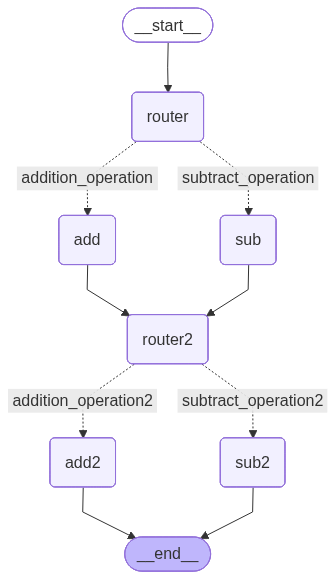

In [24]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
initial_state1 = AgentState(num1 = 10, opr = '-',num2 = 5,num3=7, opr2 = "+", num4=2)
print(app.invoke(initial_state1))

{'num1': 10, 'opr': '-', 'num2': 5, 'num3': 7, 'opr2': '+', 'num4': 2, 'ans': 5, 'ans2': 9}
